In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd



In [19]:
df=pd.read_csv('data_viz_species_data.csv')
print(df.columns)

Index(['id', 'FAMILY', 'STRATUM', 'REGION OF ORIGIN', 'TYPE OF ECOSYSTEM',
       'DISTRIBUTION', 'BIOME', 'LIFE CYCLE', 'ENVIRONMENTAL TOLERANCE',
       'LIGHT REQUIREMENT', 'CO BENEFITS', 'SIZE', 'DIAMETER', 'SEEDS/KG'],
      dtype='object')


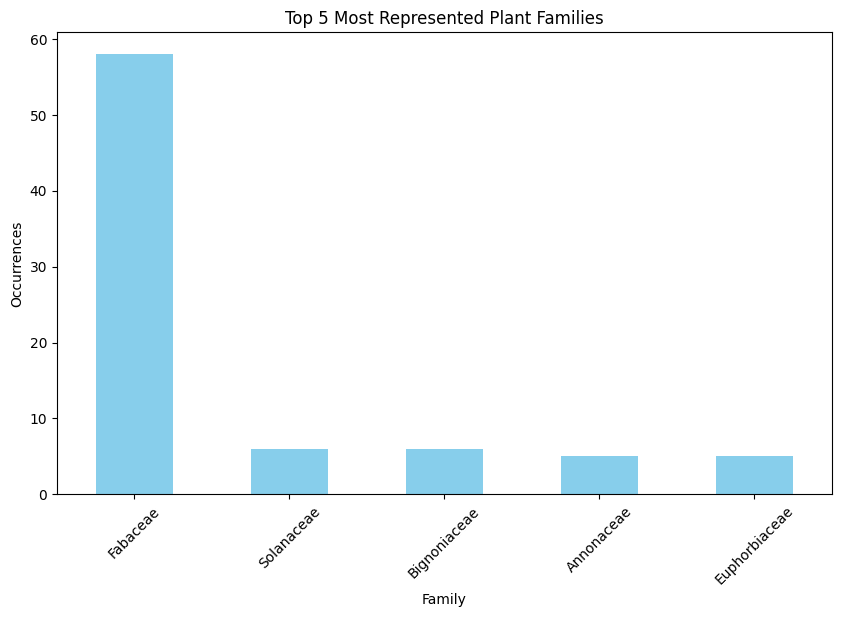

In [20]:
#Question 2
# We count the occurrences for each family
family_counts = df['FAMILY'].value_counts()

# Selection of the top 5 most represented families
top_5_families = family_counts.head(5)

# Create a bar plot for the top 5 families
plt.figure(figsize=(10, 6))
top_5_families.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Represented Plant Families')
plt.xlabel('Family')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

Unique Co-Benefits: ['Medicinal' 'Manure' 'Food' 'Wood' 'Material' 'Biodiversity'
 'Water supply' 'Patrimonial' 'Cosmetics' 'Ornamental' 'Shade' 'Biofuel'
 'Material (with fruit)' 'Edible' 'Fodder' 'Soil quality'
 'soap-substitute' 'ground cover' 'Oil' 'Coffee shade' 'Reforestation'
 'Green manure' 'landscaping' 'Dye' 'Dry fruit use as spice'
 'Wood fabrication' 'paper' 'Forage' 'Shading' 'Honey production'
 'A red resin exudes from the bark'
 'construction for purposes such as beams' 'scantlings'
 'laths and floor boards' 'Slope Bioengineering']


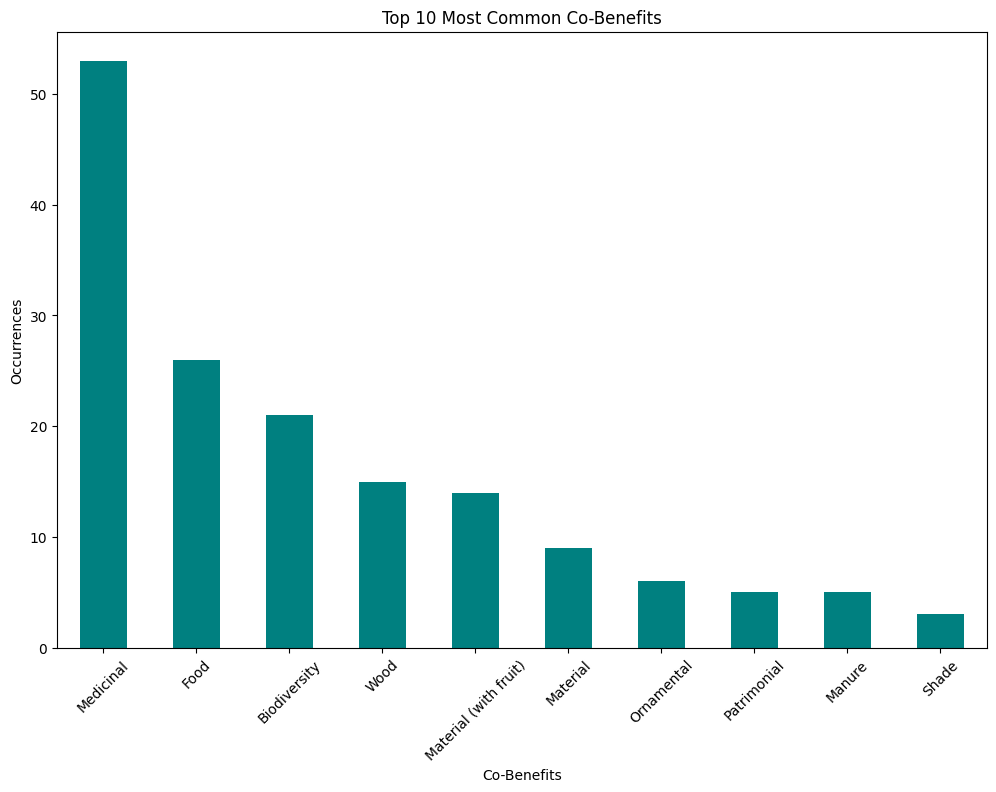

In [21]:
#Question 3

co_benefits = df['CO BENEFITS'].dropna()  # Drop missing values first
co_benefits_list = co_benefits.str.split(',')

# We start by converting the list to a pandas series
all_co_benefits = pd.Series([benefit.strip() for sublist in co_benefits_list for benefit in sublist])

# Identification of unique co_benefits
unique_co_benefits = all_co_benefits.unique()
print("Unique Co-Benefits:", unique_co_benefits)

# Count occurrences of each co-benefit
co_benefit_counts = all_co_benefits.value_counts()
common=co_benefit_counts.head(10)
# Plot the 10 most common co-benefits
plt.figure(figsize=(12, 8))
common.plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Co-Benefits')
plt.xlabel('Co-Benefits')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Question 4
#We are going to use the mean,std and median methods,but first we have to 'clean' the data
#As specified by the prompt, we first create a function named convert_to_mean which is designed to handle intervals in the data.
#we are going to work on a copy of the dataframe where we excluded the two first row
df2 = df.copy().iloc[2:]
def convert_to_mean(value):
    if pd.isna(value):
        return np.nan
    if '-' in str(value):
        low, high = value.split('-')
        return (float(low) + float(high)) / 2
    return float(value)  #if its not an interval it just return the value
# we can now pply this function to the 'size', 'diameter', and 'seeds/kg' columns
df2['SIZE'] = df2['SIZE'].apply(convert_to_mean)
df2['DIAMETER'] = df2['DIAMETER'].apply(convert_to_mean)
df2['SEEDS/KG'] = df2['SEEDS/KG'].apply(convert_to_mean)
statistics = {}
for column in ['SIZE', 'DIAMETER', 'SEEDS/KG']:
    statistics[column] = {
        'Mean': df2[column].mean(),
        'Median': df2[column].median(),
        'Standard Deviation': df2[column].std()
    }

# Print out the calculated statistics
for col, stats in statistics.items():
    print(f"{col} - Mean: {stats['Mean']:.2f}, Median: {stats['Median']:.2f}, Standard Deviation: {stats['Standard Deviation']:.2f}")

SIZE - Mean: 14.16, Median: 11.00, Standard Deviation: 12.19
DIAMETER - Mean: 56.13, Median: 40.00, Standard Deviation: 36.67
SEEDS/KG - Mean: 74370.55, Median: 14900.00, Standard Deviation: 162340.41


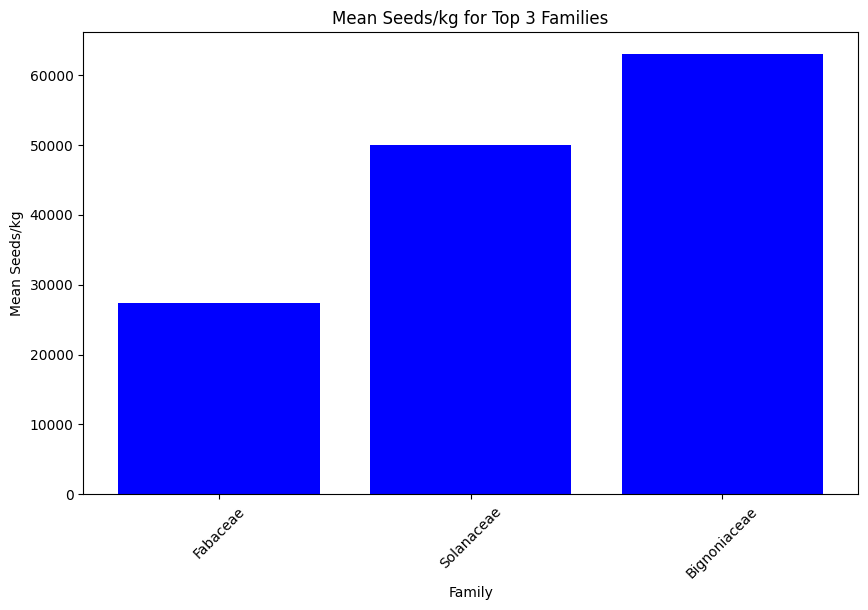

In [28]:
#Question 5
#We have the top 3 family according to question 2
mean_seeds_per_family = {
    'Fabaceae': df2.loc[df['FAMILY'] == 'Fabaceae', 'SEEDS/KG'].mean(),
    'Solanaceae': df2.loc[df['FAMILY'] == 'Solanaceae', 'SEEDS/KG'].mean(),
    'Bignoniaceae': df2.loc[df['FAMILY'] == 'Bignoniaceae', 'SEEDS/KG'].mean()
}


plt.figure(figsize=(10, 6))
plt.bar(mean_seeds_per_family.keys(), mean_seeds_per_family.values(), color='blue')
plt.title('Mean Seeds/kg for Top 3 Families')
plt.xlabel('Family')
plt.ylabel('Mean Seeds/kg')
plt.xticks(rotation=45)
plt.show()


<ipython-input-32-c9ef04350bb8>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


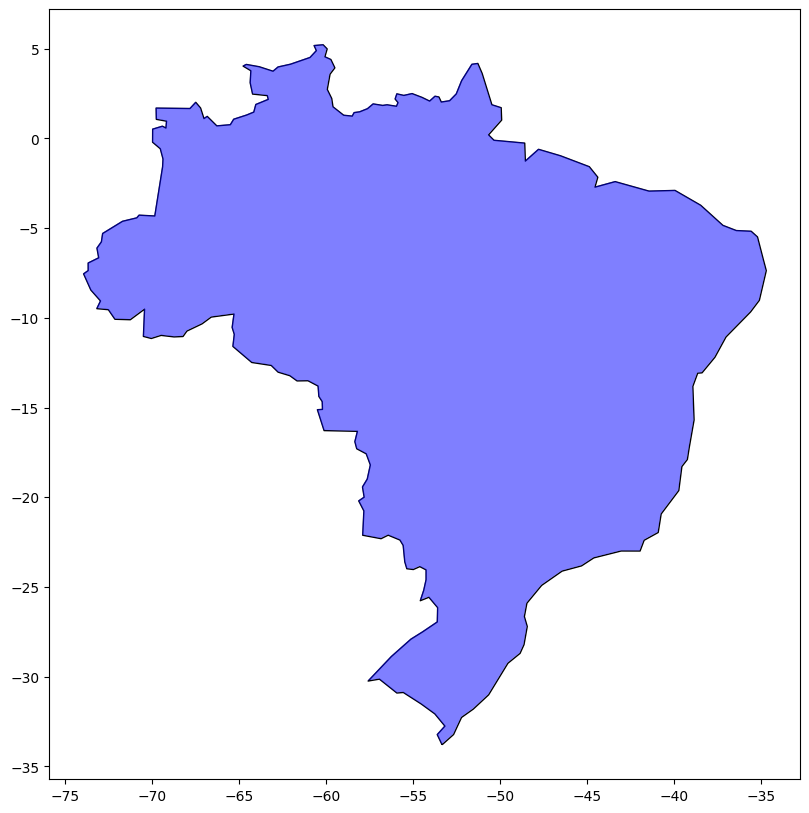

In [32]:
species_count = df2.groupby('REGION OF ORIGIN')['SEEDS/KG'].count().reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
regions = world[world['name'].isin(species_count['REGION OF ORIGIN'])]

# Merge species count data with the geographical data
map_data = regions.merge(species_count, left_on='name', right_on='REGION OF ORIGIN')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
base = regions.plot(ax=ax, color='white', edgecolor='black')
map_data.plot(ax=base, markersize=map_data['SEEDS/KG']*10, alpha=0.5, color='blue')  # Adjust size scale as needed
plt.show()

